In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector/AI-detector/fingerprint.pb
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector/AI-detector/saved_model.pb
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector/AI-detector/keras_metadata.pb
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector/AI-detector/variables/variables.index
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector/AI-detector/variables/variables.data-00000-of-00001
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector-tokenizer/AI-detector-tokenizer/tokenizer_config.json
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector-tokenizer/AI-detector-tokenizer/special_tokens_map.json
/kaggle/input/ai-detector/tensorflow2/default/1/AI-detector-tokenizer/AI-detector-tokenizer/vocab.txt
/kaggle/input/textdata/Training.csv/30w_dataset.parquet
/kaggle/input/textdata/Training.csv/train_essays.csv
/kaggle/input/textdata/Training.csv/train_v2_drcat_02.csv
/kaggle/input/textdata/Trai

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier, RUSBoostClassifier
# import optuna
from xgboost import XGBClassifier

In [4]:
from time import time
nlp = spacy.load("en_core_web_sm")
sns.set_theme(style="whitegrid", palette="pastel")

In [5]:
# import zipfile

# zip_file_path = '/content/drive/MyDrive/Training.csv.zip'
# output_dir = '/content/drive/MyDrive/'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(output_dir)


In [3]:
Original_data = pd.read_csv('/kaggle/input/textdata/Training.csv/train_essays.csv')
New_data1 = pd.read_csv('/kaggle/input/textdata/Training.csv/ai_generated_train_essays.csv')
New_data2 = pd.read_csv('/kaggle/input/textdata/Training.csv/Training_Essay_Data.csv')
New_data3 = pd.read_csv('/kaggle/input/textdata/Training.csv/train_v2_drcat_02.csv')
New_data4 = pd.read_parquet('/kaggle/input/textdata/Training.csv/30w_dataset.parquet')

In [4]:
Original_data.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [5]:
Original_data['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [6]:
Original_data = Original_data[['text', 'generated']]

In [7]:
New_data1.head()

,id,prompt_id,text,generated
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1
3,f2266d87,0,The passages provided discuss the advantages o...,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1


In [8]:
New_data1 = New_data1[['text', 'generated']]

In [9]:
New_data2.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [10]:
New_data2 = New_data2[['text', 'generated']]

In [11]:
New_data3.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [12]:
New_data3.rename(columns = {'label': 'generated'}, inplace = True)

In [13]:
New_data3 = New_data3[['text', 'generated']]

In [14]:
New_data4.head()

,text,label
0,Sexhow railway station was a railway station b...,0
1,"In Finnish folklore, all places and things, an...",0
2,"In mathematics, specifically differential calc...",0
3,is a Japanese shōjo manga series written and i...,0
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",0


In [15]:
New_data4.rename(columns = {'label': 'generated'}, inplace= True)

In [16]:
df = pd.concat([Original_data, New_data1, New_data2, New_data3, New_data4], ignore_index=True)

In [17]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375891 entries, 0 to 375890
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       374860 non-null  object
 1   generated  375891 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ MB


In [19]:
df.dropna(inplace= True)

[Text(0, 0, '195223'), Text(0, 0, '179637')]

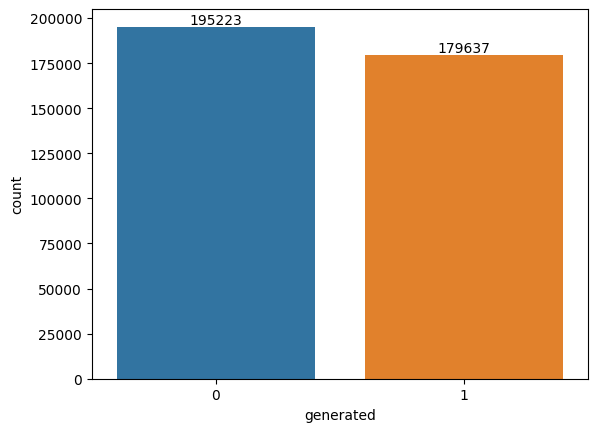

In [20]:
ax = sns.countplot(data=df, x="generated")
ax.bar_label(ax.containers[0])

In [54]:
def give_stats(text_body: str):
    doc = nlp(text_body)
    tokens = [token.text for token in doc if token.is_alpha]
    n_tokens = len(tokens)
    avg_token_len = 0
    max_token_len = 0
    min_token_len = 100
    for token in tokens:
        avg_token_len += len(token)
        max_token_len = max(max_token_len, len(token))
        min_token_len = min(min_token_len, len(token))
    avg_token_len /= n_tokens
    print(f'Num. of Tokens: {n_tokens}, Avg. Token Length: {avg_token_len}, Max. Token Length: {max_token_len}, Min. Token Length: {min_token_len}')

In [55]:
text_ai = df[df['generated'] == 1].sample(1)['text'].iloc[0]
text_human = df[df['generated'] == 0].sample(1)['text'].iloc[0]

In [56]:
give_stats(text_ai)
give_stats(text_human)

Num. of Tokens: 111, Avg. Token Length: 4.891891891891892, Max. Token Length: 10, Min. Token Length: 1
Num. of Tokens: 381, Avg. Token Length: 4.650918635170604, Max. Token Length: 14, Min. Token Length: 1


In [57]:
sampled_df = df.sample(frac=0.2, random_state=42)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(sampled_df['text'], sampled_df['generated'], test_size=0.2, random_state=42)
t = time()
vectorizer = TfidfVectorizer(ngram_range=(2, 5), max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(f"Time taken to vectorize: {time() - t:.3f}")

Time taken to vectorize: 313.514


In [ ]:
models = {
    'EasyEnsembleClassifier': EasyEnsembleClassifier(random_state=42),
    'BalancedRandomForestClassifier': BalancedRandomForestClassifier(random_state=42),
    'RUSBoostClassifier': RUSBoostClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight),
    'LGBMClassifier': LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight),
    'CatBoostClassifier': CatBoostClassifier(random_state=42, iterations=150)
}

for model_name, model in models.items():
    print(f'Model Name: {model_name}')
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    t0 = time()
    avg_roc_score = 0
    for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        t1 = time()
        print(f'Fold no.: {i + 1}')
        X_train, X_test, Y_train, Y_test = X_train[train_idx], X_train[test_idx], Y_train[train_idx], Y_train[test_idx]
        t2 = time()
        clf = model
        clf.fit(X_train, Y_train)
        print(f"Time taken to fit: {time() - t2:.3f}s")

        y_pred_prob = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        avg_roc_score += auc
        print(f'The ROC_AUC Score is: {auc}')
        print(f'Time taken for the fold: {time() - t1:.3f}s')
    avg_roc_score /= 3
    print(f'Avg Roc Score: {avg_roc_score}')
    print(f'Total time taken: {time() - t0:.3f}s')

In [60]:
scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()
clf = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
%%time
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)
print(f'The ROC_AUC Score is: {auc}')

The ROC_AUC Score is: 0.9176502747258525
CPU times: user 117 ms, sys: 33 µs, total: 117 ms
Wall time: 59.3 ms


In [63]:
%%time
clf = EasyEnsembleClassifier(random_state=42)
clf.fit(X_train, Y_train)

CPU times: user 3min 24s, sys: 42.8 ms, total: 3min 25s
Wall time: 3min 25s


EasyEnsembleClassifier(random_state=42)

In [66]:
%%time
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)
print(f'The ROC_AUC Score is: {auc}')

The ROC_AUC Score is: 0.9107769062676192
CPU times: user 796 ms, sys: 1.02 ms, total: 797 ms
Wall time: 795 ms


In [67]:
%%time
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


CPU times: user 3min 23s, sys: 496 ms, total: 3min 24s
Wall time: 3min 24s


BalancedRandomForestClassifier(random_state=42)

In [68]:
%%time
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)
print(f'The ROC_AUC Score is: {auc}')

The ROC_AUC Score is: 0.9107769062676192
CPU times: user 798 ms, sys: 1.94 ms, total: 800 ms
Wall time: 797 ms


In [69]:
%%time
clf = RUSBoostClassifier(random_state=42)
clf.fit(X_train, Y_train)

CPU times: user 22.1 s, sys: 548 ms, total: 22.7 s
Wall time: 22.7 s


RUSBoostClassifier(random_state=42)

In [70]:
%%time
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)
print(f'The ROC_AUC Score is: {auc}')

The ROC_AUC Score is: 0.8408210970262893
CPU times: user 489 ms, sys: 3.93 ms, total: 493 ms
Wall time: 489 ms


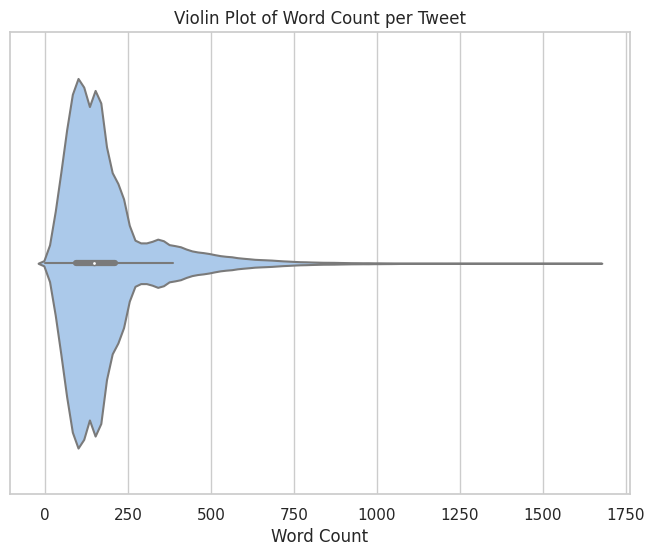

In [71]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Calculate the statistics
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['word_count'])
plt.title('Violin Plot of Word Count per Tweet')
plt.xlabel('Word Count')
plt.show()

In [72]:
df = df.drop('word_count', axis = 1)

In [23]:
df = df.sample(frac=0.05, random_state=42)

In [24]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'train_merged' is your DataFrame and 'generated' is the label column
majority_class = df[df['generated'] == 0]
minority_class = df[df['generated'] == 1]

In [25]:
# Downsample the minority class
majority_downsampled = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match the number of minority class
                                random_state=42)  # For reproducibility

In [26]:
df = pd.concat([majority_downsampled, minority_class])

In [27]:
print("Training labels distribution:", np.bincount(df['generated']))

Training labels distribution: [8968 8968]


In [28]:
from sklearn.model_selection import train_test_split

# First, split into train+val and test
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['generated'])

# Now, split the train+val into train and validation
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['generated'])

# Print the sizes of the splits to verify
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 16142
Validation set size: 1794
Test set size: 1794


## Training Transformer Models

In [21]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

import tensorflow as tf
# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [29]:
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=512,return_tensors="tf")
val_encodings = tokenizer(val_df['text'].tolist(), truncation=True, padding=True, max_length=512, return_tensors="tf")
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True,padding=True, max_length=512, return_tensors="tf")

In [30]:
# Convert encodings and labels into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_df['generated'].tolist()))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_df['generated'].tolist()))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_df['generated'].tolist()))

# Batch the datasets
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(8)
val_dataset = val_dataset.batch(16)
test_dataset = test_dataset.batch(16)

In [31]:
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Compile the model
class DistilBertWithDropout(tf.keras.Model):
    def __init__(self, base_model, num_labels, dropout_rate=0.3):
        super(DistilBertWithDropout, self).__init__()
        self.base_model = base_model  # Assign the base_model correctly
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.classifier = tf.keras.layers.Dense(num_labels, activation='softmax')
        self.num_labels = num_labels
        self.dropout_rate = dropout_rate

    def call(self, inputs, training=False):
        outputs = self.base_model(inputs)
        
        if len(outputs[0].shape) == 3:
            # Assume the output is [batch_size, sequence_length, hidden_size]
            pooled_output = outputs[0][:, 0, :]  # Extract the [CLS] token's output
        elif len(outputs[0].shape) == 2:
            # Assume the output is [batch_size, hidden_size] directly
            pooled_output = outputs[0]
        else:
            raise ValueError("Unexpected output shape from the base model.")
        
        dropout_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(dropout_output)
        return logits
        
    def get_config(self):
        # Ensure proper serialization
        return {
            "num_labels": self.num_labels,
            "dropout_rate": self.dropout_rate,
        }

num_labels = 2
dropout_rate = 0.3
model = DistilBertWithDropout(distilbert_model, num_labels, dropout_rate)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [32]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model", save_best_only=True, save_format='tf')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [33]:
# Train the model with callbacks
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs= 1,  # You can set this to a higher number
    callbacks=[checkpoint_cb, early_stopping_cb]
)

I0000 00:00:1732009050.797975     112 service.cc:145] XLA service 0x7c9d8a0854b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732009050.798035     112 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1732009050.987196     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2018/2018 [==============================] - 648s 302ms/step - loss: 0.2340 - accuracy: 0.8895 - val_loss: 0.1208 - val_accuracy: 0.9599


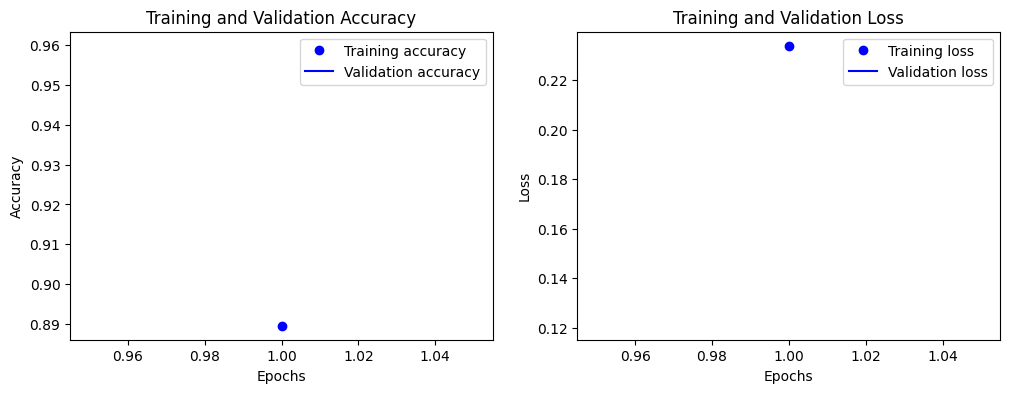

In [34]:
# Retrieve a list of accuracy results on training and validation data
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

113/113 [==============================] - 20s 177ms/step - loss: 0.1208 - accuracy: 0.9599
Test Loss: 0.12078384310007095
Test Accuracy: 0.9598662257194519


In [36]:
# Make predictions on the test set
y_pred = model.predict(test_dataset)

# Since the model outputs logits, convert these to predicted class labels
y_pred_labels = tf.argmax(y_pred, axis=1)

113/113 [==============================] - 23s 174ms/step


In [37]:
# Extract true labels from the test set

y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy())

# Convert to a TensorFlow tensor for compatibility
y_true = tf.convert_to_tensor(y_true)

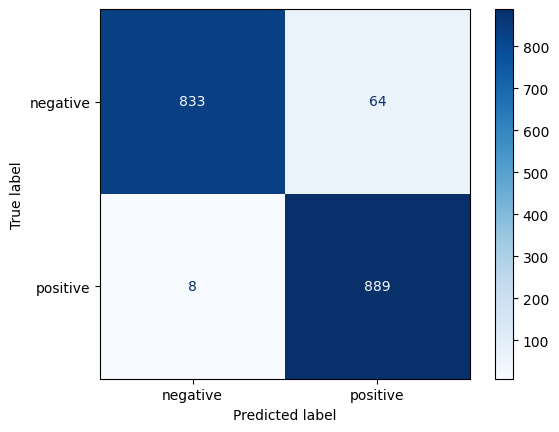

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Manually define the class labels if not available in the model config
class_labels = ['negative', 'positive']  # Replace with your actual class names

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [60]:
def predict_text(input_text):
    # Tokenize the input text (wrap the single string in a list)
    input_encodings = tokenizer([input_text], truncation=True, padding=True, max_length=512, return_tensors="tf")
    
    # Make prediction using the already trained model
    predictions = model(input_encodings)
    
    # Get the predicted label (0 or 1)
    predicted_label = np.argmax(predictions, axis=-1)[0]  # Fetch the first element (batch size 1)
    
    # Display the result
    if predicted_label == 0:
        return "Human-Generated"
    else:
        return "AI-Generated"

In [79]:
predict_text("""Limiting car usage has numerous advantages for both individuals and society as a whole. The passages provide examples of communities and cities that have implemented measures to promote alternative transportation and reduce car dependence, and these examples serve as evidence for the benefits of such initiatives.

One major advantage of limiting car usage is the reduction in greenhouse gas emissions. Cars are a significant contributor to greenhouse gas emissions, particularly in suburban areas where car usage is high. According to the passages, passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in some car-intensive areas in the United States. By reducing the number of cars on the road and promoting alternative forms of transportation like public transit or cycling, communities can make significant strides in reducing their carbon footprint.

Another advantage of limiting car usage is the improvement in air quality. The passages highlight how smog and pollution levels decreased when driving was restricted in Paris and Bogota. These cities experienced a significant decrease in congestion and smog when cars were banned or limited to certain days. This improved air quality has health benefits for residents, as poor air quality can lead to respiratory issues and other health problems.

Limiting car usage also has positive implications for urban planning and city design. The passages mention the concept of ""smart planning,"" where suburbs are designed to be more compact and accessible to public transportation. This includes placing stores and services within walking distance, rather than having them spread out along highways. This type of planning promotes walkability and reduces the need for cars, resulting in more livable and sustainable communities.

Furthermore, limiting car usage can have economic benefits. The passages mention how car-free initiatives can lead to the development of alternative transportation infrastructure, such as bike lanes and public transit systems. This can create job opportunities and boost the local economy. Additionally, households that choose to forgo car ownership can save money on car-related expenses like gas, maintenance, and insurance.

In conclusion, limiting car usage has numerous advantages, ranging from environmental benefits like reduced greenhouse gas emissions and improved air quality, to improved urban planning and economic benefits. By promoting alternative forms of transportation and implementing measures to reduce car dependence, communities and cities can create more sustainable and livable environments for their residents.
""")

'AI-Generated'

In [41]:
# Save the custom model
model.save('./AI-detector', save_format='tf')

# Save the tokenizer
tokenizer.save_pretrained('./AI-detector-tokenizer')


('./AI-detector-tokenizer/tokenizer_config.json',
 './AI-detector-tokenizer/special_tokens_map.json',
 './AI-detector-tokenizer/vocab.txt',
 './AI-detector-tokenizer/added_tokens.json')